In [1]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# 2. Set Path
path = r'C:\Users\karya\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\karya\\Instacart Basket Analysis'

In [4]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_orders_products_customer_merged_ex10_final_report.pkl'))

In [5]:
# To display all columns in the df
pd.set_option('display.max_columns', None)

In [6]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,_merged2,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity_exclusion_flag,age_group,income_group,n_dependants_group,department,family_profile
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,30-39,low income,Has Dependants,beverages,married female with children


In [7]:
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merged2', 'price_range_loc', 'Busiest day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region',
       'customer_activity_exclusion_flag', 'age_group', 'income_group',
       'n_dependants_group', 'department', 'family_profile'],
      dtype='object')

### Creating the visualizations to show the distribution of profiles

### 1. Distribution of  Family Proifiles

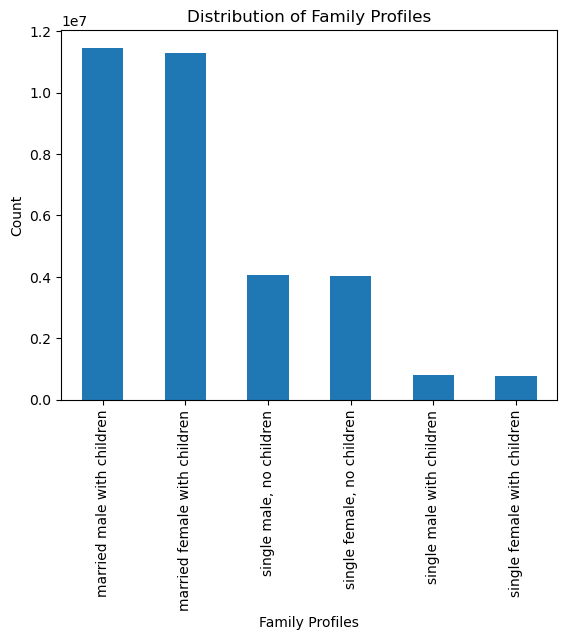

In [8]:
family_profile_dist_bar = df_final['family_profile'].value_counts().plot.bar()
plt.title('Distribution of Family Profiles')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.show()

In [9]:
# Exporting the bar 
family_profile_dist_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution_bar.png'))

### Basic Stats for family profile

In [10]:
# Aggregating the max, mean, and min variables on a customer-profile level (family_profile) for usage frequency and expenditure

family_profile_agg = df_final.groupby('family_profile').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [11]:
family_profile_agg

order_id prices                    
                                 count    min       mean      max
family_profile                                                   
married female with children  11295524    1.0  11.935186  99999.0
married male with children    11461229    1.0  12.075114  99999.0
single female with children     757721    1.0  12.053650  99999.0
single female, no children     4036585    1.0  11.741201  99999.0
single male with children       792882    1.0   9.658204  99999.0
single male, no children       4060918    1.0  12.514959  99999.0

### Comparing customers profiles with regions and departments

### Family Profile distribution by region

In [12]:
# family_profile in different regions 
fam_region_profile = pd.crosstab(df_final['family_profile'],df_final['region'], dropna = False)

In [13]:
fam_region_profile

region,Midwest,Northeast,South,West
family_profile,,,,
married female with children,2678725,1946051,3733489,2937259
married male with children,2646883,2090270,3827153,2896923
single female with children,179274,124255,265928,188264
"single female, no children",948646,693638,1374297,1020004
single male with children,187243,143859,263656,198124
"single male, no children",956554,724663,1327362,1052339


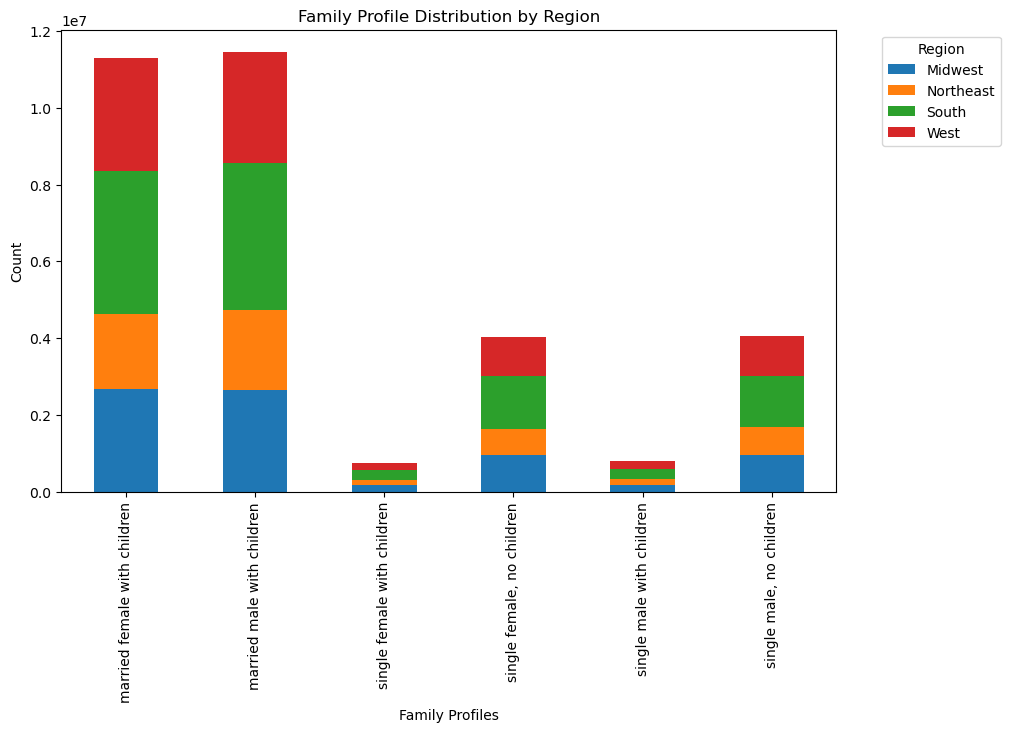

In [14]:
fam_profile_region_bar_stacked = fam_region_profile.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Family Profile Distribution by Region')
plt.xlabel('Family Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [15]:
# Exporting the figure
fam_profile_region_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_profile_region_bar_stacked11.png'))

### Family Profile Distribution by Department

In [16]:
# Comparing family_profile in different departments - crosstab created 
fam_profile_departments = pd.crosstab(df_final['department'],df_final['family_profile'], dropna = False)

In [17]:
fam_profile_departments

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
department,,,,,,
alcohol,55537,50145,4055,19721,4841,19397
babies,145456,151706,9634,52039,10512,54455
bakery,411425,410456,27562,145948,28580,148457
beverages,940005,949047,61041,336899,63588,337543
breakfast,246337,247388,17150,86810,17581,87767
bulk,12296,12325,795,4230,879,4048
canned goods,370907,381123,24266,131284,26924,133554
dairy eggs,1880717,1907881,128229,675242,132558,674120
deli,365772,369917,24892,131968,25523,133177


<Figure size 1000x1200 with 0 Axes>

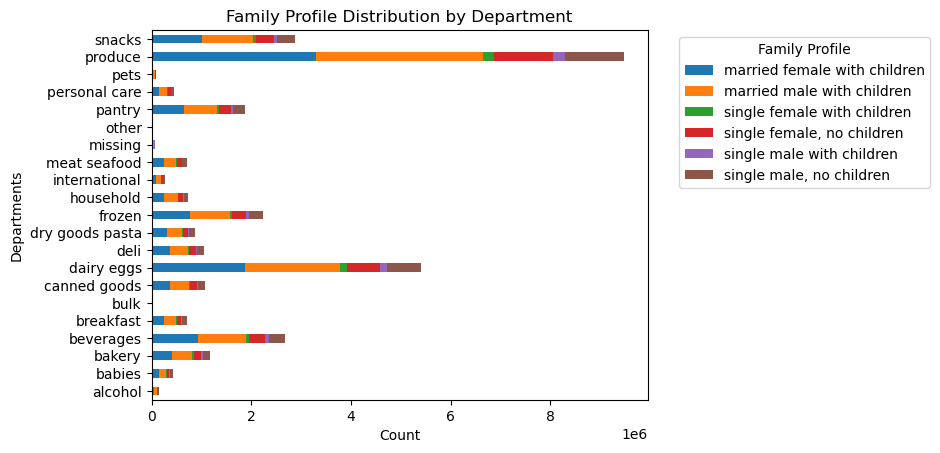

In [18]:
fam_profile_departments_bar = fam_profile_departments.sort_values(by='married female with children', ascending=True)

plt.figure(figsize=(10, 12))  
fam_profile_departments.plot.barh(stacked=True)

plt.title('Family Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Family Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot

plt.show()

In [19]:
# Exporting the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_departments_profile_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Income (income_group) Distribution stats

In [20]:
income_group_dist_agg = df_final.groupby('income_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [21]:
income_group_dist_agg

order_id prices                    
                  count    min       mean      max
income_group                                      
high income     8069378    1.0  22.099148  99999.0
low income      8183863    1.0   7.300145  14900.0
middle income  16151618    1.0   9.296144  99999.0

### Income (income_group) Distribution

Text(0, 0.5, 'Count')

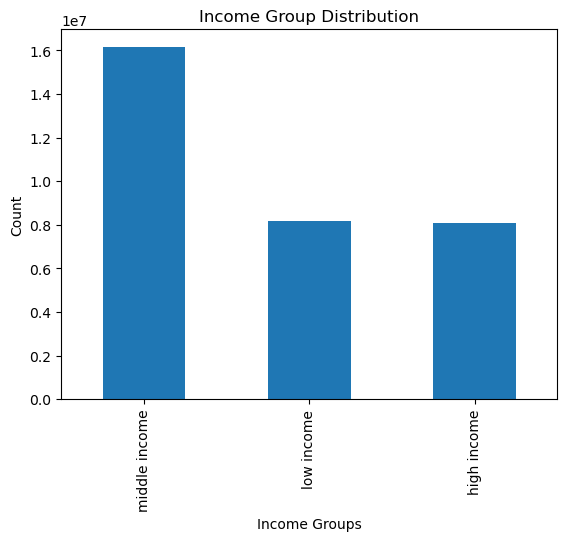

In [22]:
income_group_distribution = df_final['income_group'].value_counts().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')

In [23]:
income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_distribution_bar11.png'))

### Income (income_group) By Region

In [24]:
income_group_region = pd.crosstab(df_final['income_group'],df_final['region'], dropna = False)

In [25]:
income_group_region

region,Midwest,Northeast,South,West
income_group,,,,
high income,1918845,1434075,2657190,2059268
low income,1896659,1442566,2743303,2101335
middle income,3781821,2846095,5391392,4132310


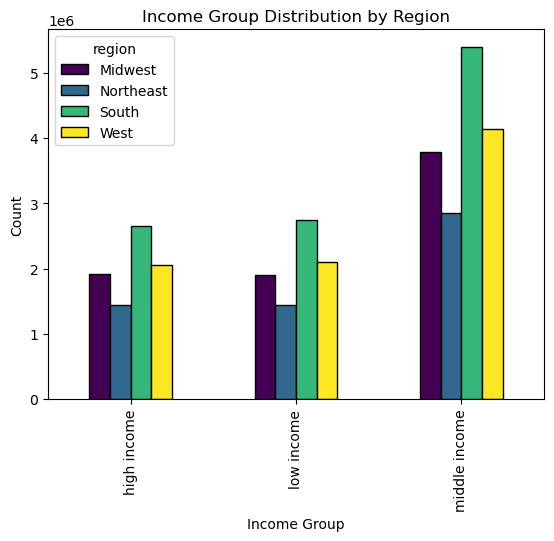

In [26]:
income_group_region_bar = income_group_region.plot(kind='bar', colormap='viridis', edgecolor='black')

# Adding labels and title
plt.title('Income Group Distribution by Region')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [27]:
income_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_region_bar11.png'))

### Income Group Distribution by Department

In [28]:
income_group_department = pd.crosstab(df_final['department'],df_final['income_group'], dropna = False) 

In [29]:
income_group_department

income_group,high income,low income,middle income
department,,,
alcohol,42677,39966,71053
babies,108646,87475,227681
bakery,302219,280335,589874
beverages,643880,782944,1261299
breakfast,169925,198254,334854
bulk,7779,9770,17024
canned goods,279032,238437,550589
dairy eggs,1365889,1294127,2738731
deli,261899,262602,526748


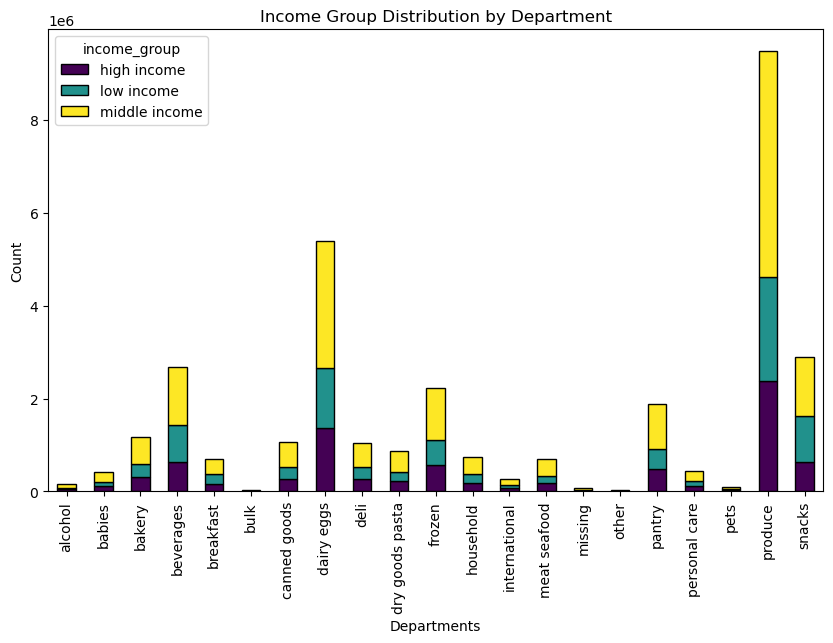

In [30]:
income_group_department_bar = income_group_department.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(10, 6))

# labels and title
plt.title('Income Group Distribution by Department')
plt.xlabel('Departments')
plt.ylabel('Count')

# Show the plot
plt.show()

In [31]:
# Exporting the bar
income_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_department_bar11.png'))

### Age groups Distribution

In [32]:
age_group_agg = df_final.groupby('age_group').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [33]:
age_group_agg

order_id prices                    
             count    min       mean      max
age_group                                    
18-29      6090441    1.0  12.171977  99999.0
30-39      5073751    1.0  11.933288  99999.0
40-49      5109237    1.0  12.384515  99999.0
50-59      5064175    1.0  11.862746  99999.0
60-69      4987264    1.0  11.627890  99999.0
70+        6079991    1.0  11.874439  99999.0

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count')

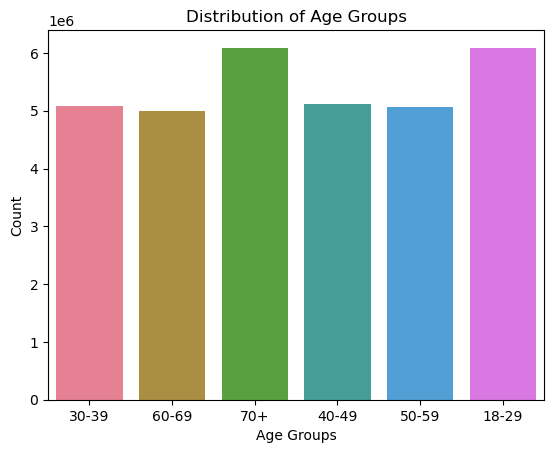

In [34]:
colors = sns.color_palette("husl", len(df_final['age_group'].unique()))
age_group_distribution_bar = sns.countplot(x='age_group', data=df_final, palette=colors)

#  labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')

In [35]:
# Exporting the bar
age_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_bar11.png'))

### Age Groups by Region

In [36]:
age_group_region = pd.crosstab(df_final['region'], df_final['age_group'], dropna = False)

In [37]:
age_group_region

age_group,18-29,30-39,40-49,50-59,60-69,70+
region,,,,,,
Midwest,1420705,1180424,1227062,1199596,1161370,1408168
Northeast,1070437,888917,900208,890071,884533,1088570
South,2052633,1723110,1677004,1653555,1664412,2021171
West,1546666,1281300,1304963,1320953,1276949,1562082


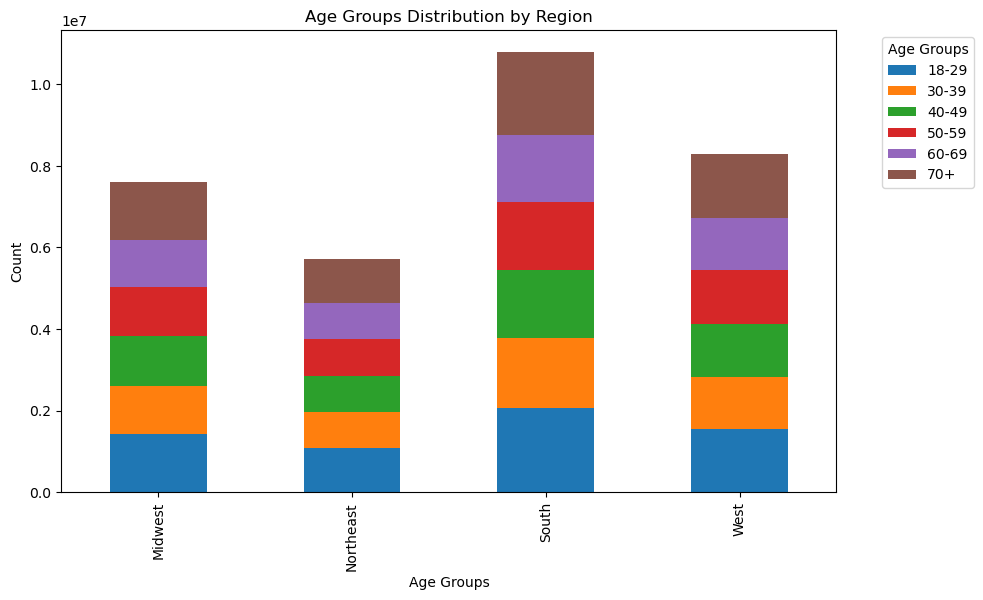

In [39]:
age_group_region_bar = age_group_region.plot(kind='bar', stacked=True, figsize=(10, 6))

#  labels and title
plt.title('Age Groups Distribution by Region')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [40]:
age_group_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_region_bar11.png'))

### Age Groups by Departments

In [41]:
age_group_department = pd.crosstab(df_final['department'], df_final['age_group'], dropna = False)

In [42]:
age_group_department

age_group,18-29,30-39,40-49,50-59,60-69,70+
department,,,,,,
alcohol,29771,25118,23973,24170,22837,27827
babies,80464,65909,69248,65269,64885,78027
bakery,220357,183863,184533,183655,180137,219883
beverages,499543,414617,425165,425090,412810,510898
breakfast,134294,108948,111180,109714,106557,132340
bulk,6606,5396,5581,5187,5368,6435
canned goods,202942,166296,167484,167598,165143,198595
dairy eggs,1018001,852077,854998,835589,823787,1014295
deli,197434,164566,165955,163792,162935,196567


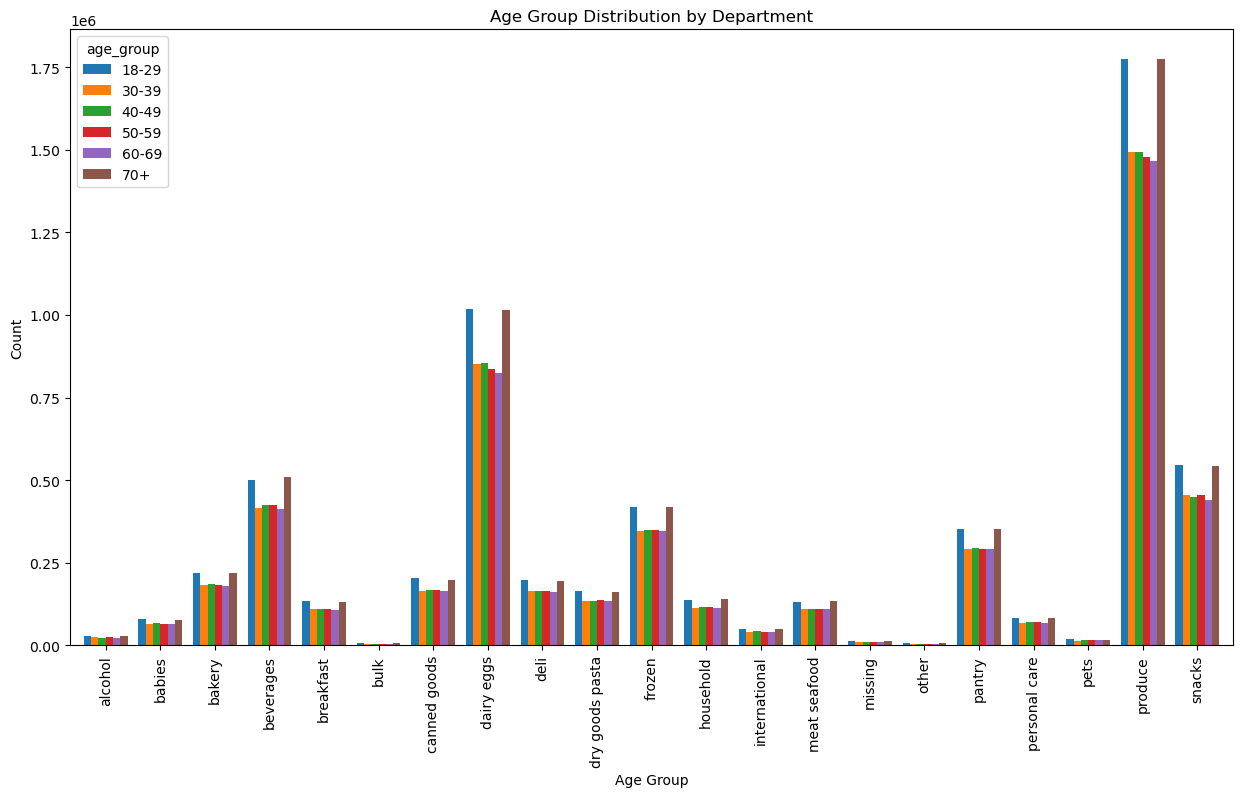

In [43]:
age_group_department_bar = age_group_department.plot(kind='bar', figsize=(15, 8), width=0.8)  
plt.title('Age Group Distribution by Department')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.show()

In [44]:
# Eporting the bar
age_group_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_department_bar11.png'))

### Most Requested Departments

In [45]:
departments_stats = df_final.groupby('department').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})

In [46]:
departments_stats

order_id prices                    
                   count    min       mean      max
department                                         
alcohol           153696    1.0   8.143701     15.0
babies            423802    1.0   7.638380     15.0
bakery           1172428    1.0   7.853809     15.0
beverages        2688123    1.0   7.680502     15.0
breakfast         703033    1.0   8.028963     14.9
bulk               34573    1.4   8.348960     14.1
canned goods     1068058    1.0   7.539976     15.0
dairy eggs       5398747    1.0  33.479533  99999.0
deli             1051249    1.0   7.778701     15.0
dry goods pasta   866627    1.0   7.350283     15.0
frozen           2234743    1.0   7.736553     15.0
household         738666    1.0   7.384058     15.0
international     269253    1.0   7.682264     15.0
meat seafood      708927    8.0  16.294443     25.0
missing            69145    1.0   8.660716     15.0
other              36291    1.1   6.990934     15.0
pantry           1875369    1.0   8.009443     20.0
personal care     447572    1.0   7.996769     15.0
pets               97716    1.0   7.889070     15.0
produce          9479291    1.0   7.981708     15.0
snacks           2887550    1.6   4.275437      7.0

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


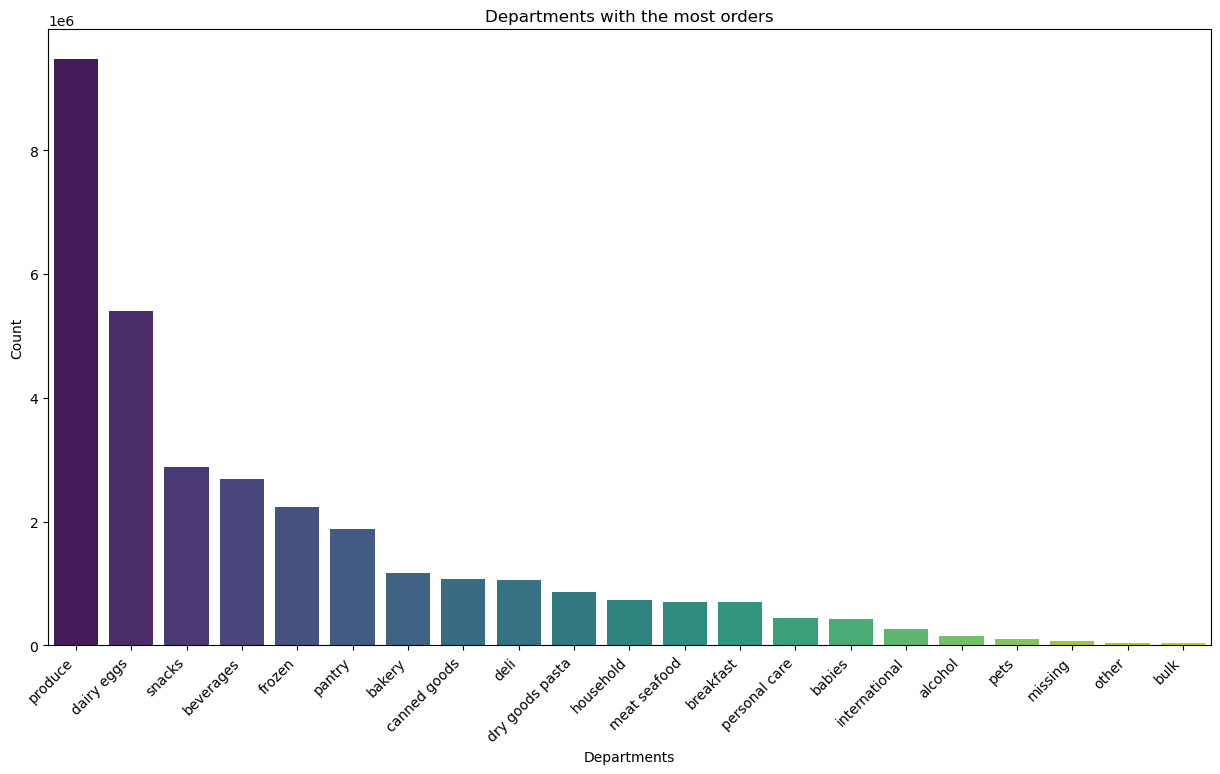

In [47]:
department_counts = df_final['department'].value_counts()

departments_distribution_bar = plt.figure(figsize=(15, 8))
sns.barplot(x=department_counts.index, y=department_counts.values, palette='viridis')
plt.title('Departments with the most orders')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show() 

In [48]:
# Exporting the bar
departments_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_distribution_bar11.png'))

### Departments by Regions

In [49]:
departments_regions = pd.crosstab(df_final['department'],df_final['region'], dropna = False)

In [50]:
departments_regions

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


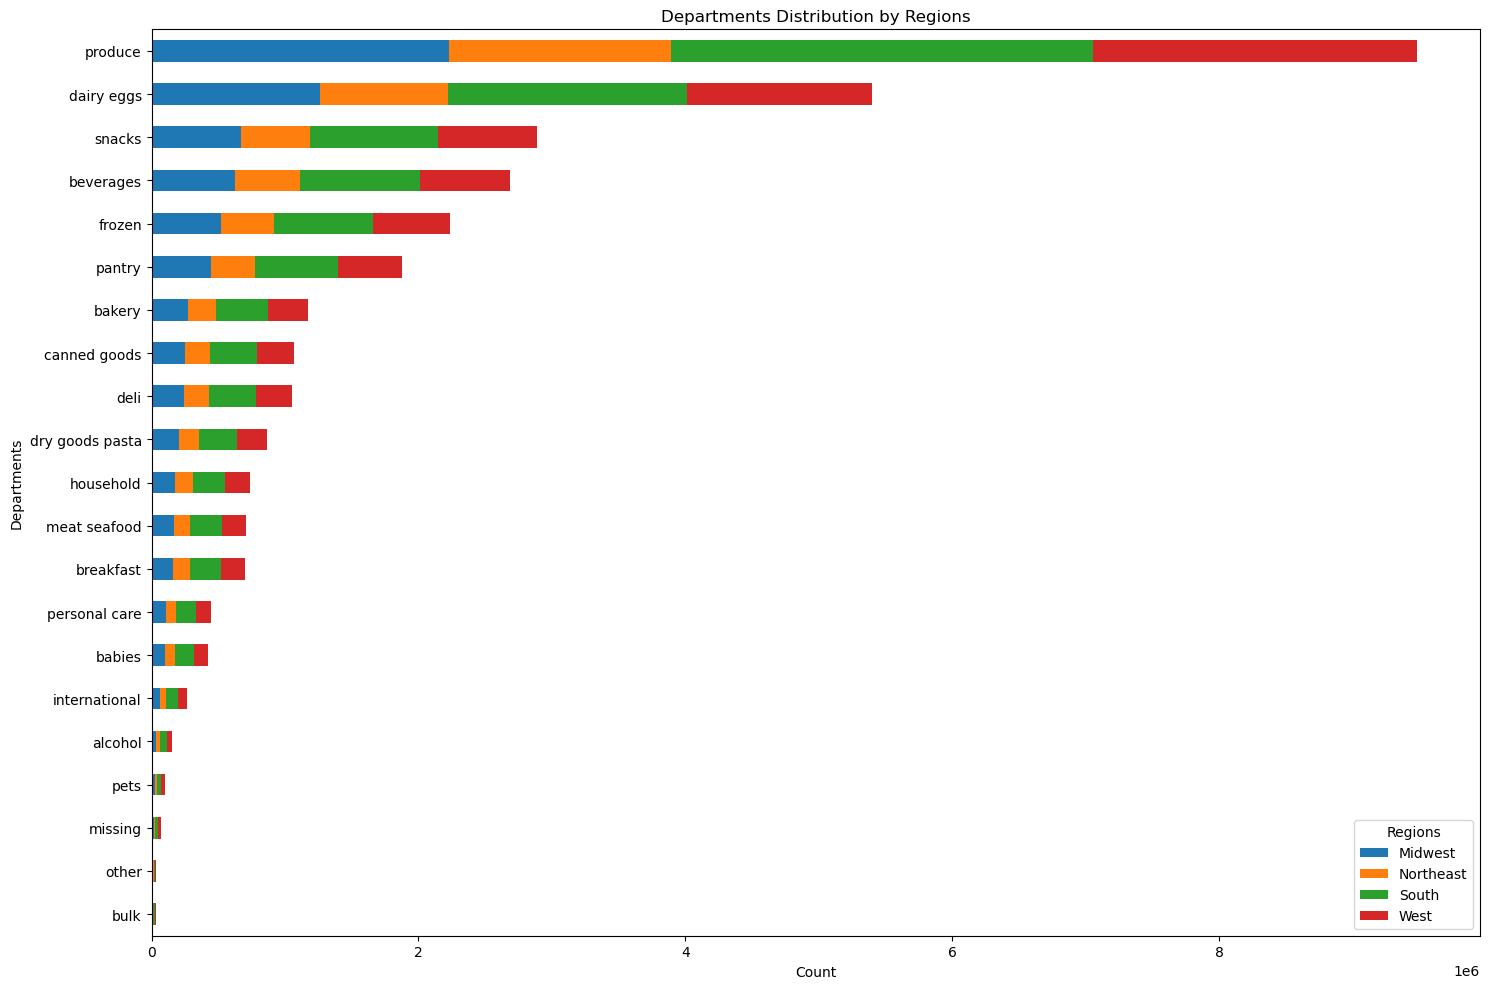

In [51]:
departments_regions_bar = departments_regions.sort_values(by='Midwest', ascending=True).plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Departments Distribution by Regions')
plt.xlabel('Count')
plt.ylabel('Departments')
plt.legend(title='Regions')
plt.tight_layout() 

plt.show()


In [52]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments_regions_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Key business Questions - Answers

### 1. Busiest Days of the Week

In [53]:
df_final['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [54]:
# Replacing the numbers with the Names of the days of the week for which they stand: 0 = Saturday, 1 = Sunday, 2= Monday, 3 = Tuesday, 4=  Wednesday, 5 = Thursday, 6  = Friday; I created a new column called 'week_days_orders'
df_final['week_days_orders'] = df_final['orders_day_of_week'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})

In [55]:
# Lets check:
df_final['week_days_orders'].value_counts(dropna = False)

week_days_orders
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

In [56]:
busiest_week_days = df_final['week_days_orders'].value_counts(dropna = False)

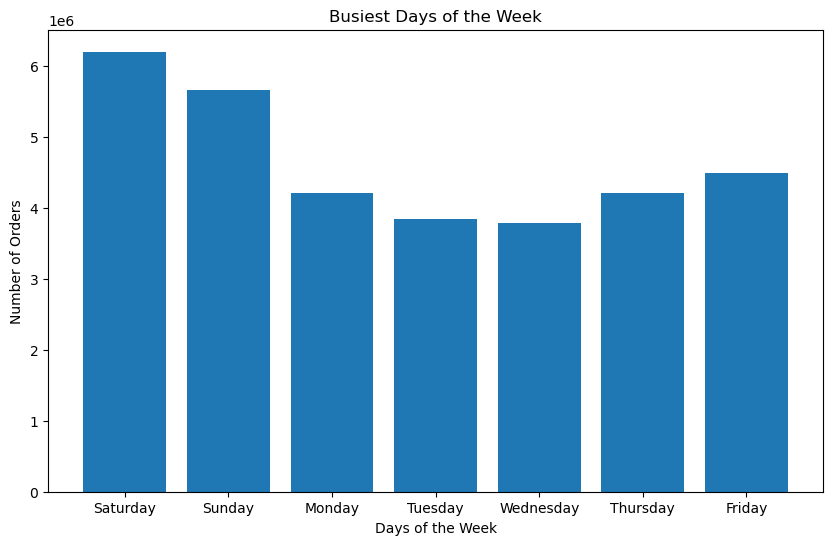

In [57]:
busiest_week_days_bar = df_final['week_days_orders'].value_counts()

# Sorting the days of the week in the correct order

days_of_week_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
busiest_week_days_bar = busiest_week_days_bar.reindex(days_of_week_order)

# Creating a bar chart

plt.figure(figsize=(10, 6))
plt.bar(busiest_week_days_bar.index, busiest_week_days_bar.values)
plt.title('Busiest Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()


In [58]:
# Exporting the bar
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_week_days_bar11.png'))

<Figure size 640x480 with 0 Axes>

### 2. Busiest Hours of the Day

Text(0.5, 0, 'Hour of the Day')

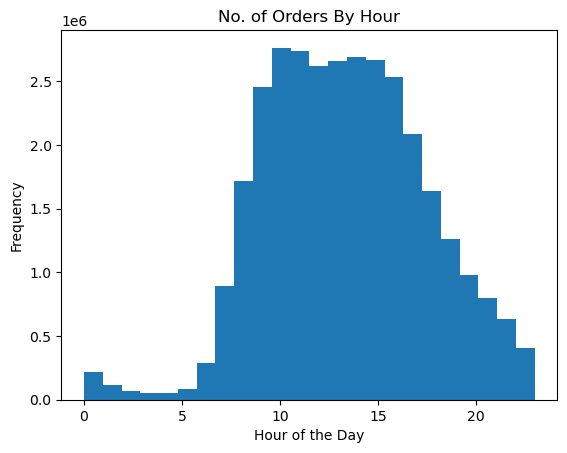

In [59]:
order_hour_of_day_hist = df_final['order_time_of_day'].plot.hist(bins = 24, title = 'No. of Orders By Hour')
plt.xlabel('Hour of the Day')

In [60]:
# Exporting the Histogram
order_hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_hist11.png'))

### Hours during the day when people spend the more money

In [61]:
prices_by_hour = pd.crosstab(df_final['order_time_of_day'],df_final['price_range_loc'], dropna = False)

In [62]:
prices_by_hour

price_range_loc,High-range product,Low-range product,Mid-range product
order_time_of_day,,,
0,2779,68160,147830
1,1416,35953,78331
2,925,21785,46665
3,647,15795,34839
4,696,16507,36039
5,1067,27214,59680
6,3740,89902,196851
7,11595,275920,603539
8,21947,536748,1159423


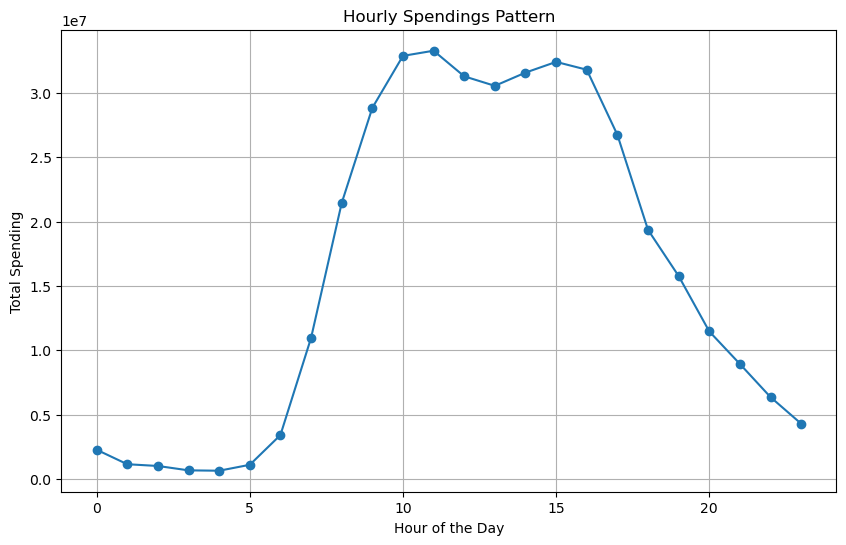

In [63]:
hourly_spendings = df_final.groupby('order_time_of_day')['prices'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hourly_spendings.index, hourly_spendings.values, marker='o')
ax.set_title('Hourly Spendings Pattern')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Spending')
ax.grid(True)


In [64]:
# Export the line chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hourly_spending_plot11.png'))

### Price Range Groupings

In [65]:
df_final['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Text(0.5, 0, 'Price Ranges')

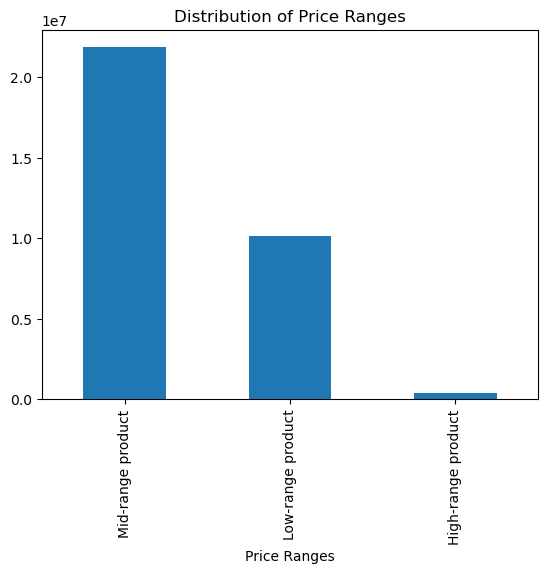

In [66]:
# Price range bar chart created from 'price_range_loc' column
price_range_bar = df_final['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')
plt.xlabel('Price Ranges')

In [67]:
# Exporting the bar
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'distribution_of_price_range_bar11.png'))

### Income Distribution By Price Range

In [68]:
price_range_income = pd.crosstab(df_final['price_range_loc'],df_final['income_group'], dropna = False)

In [69]:
price_range_income

income_group,high income,low income,middle income
price_range_loc,,,
High-range product,117142,75510,225026
Low-range product,2398466,2937175,4790680
Mid-range product,5553770,5171178,11135912


Text(0, 0.5, 'Count')

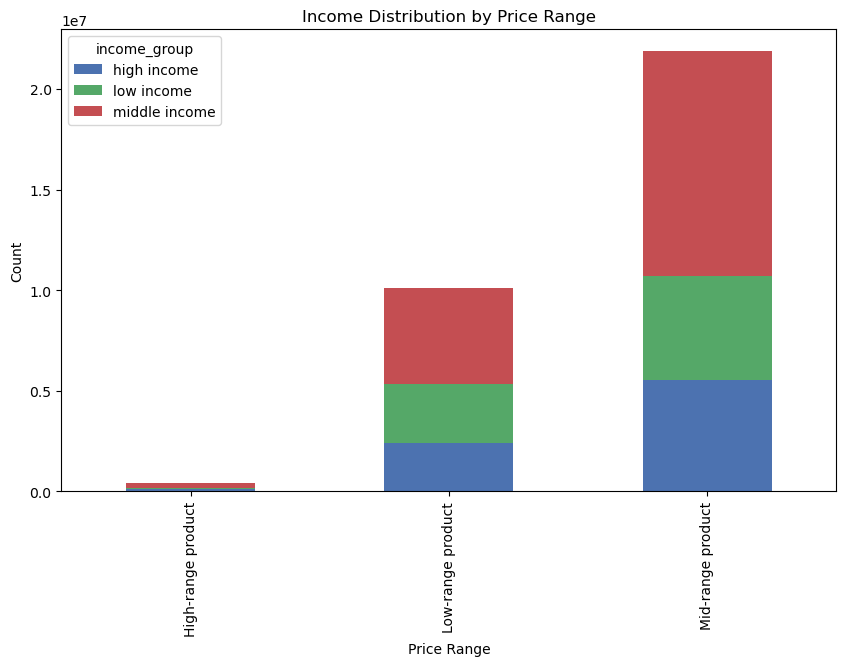

In [70]:
# Creating a stacked bar chart with custom color

price_range_income.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Income Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')


In [71]:
# Exporting the stacked bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_income_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Price Range and the  Family Profile Distribution

In [72]:
price_range_family_profile = pd.crosstab(df_final['price_range_loc'],df_final['family_profile'], dropna = False)

In [73]:
price_range_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
price_range_loc,,,,,,
High-range product,146459,149074,9599,50405,10369,51772
Low-range product,3531449,3580087,236953,1261469,246508,1269855
Mid-range product,7617616,7732068,511169,2724711,536005,2739291


Text(0, 0.5, 'Count')

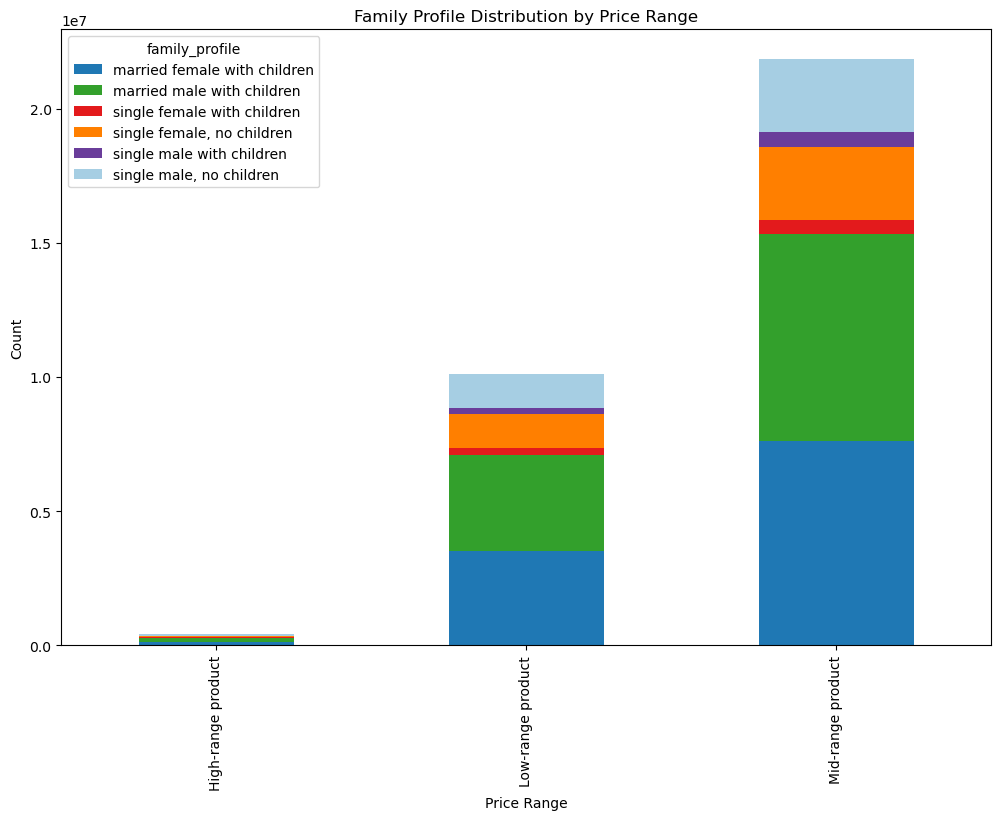

In [74]:
# Reorder columns

price_range_family_profile = price_range_family_profile[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]

# Define custom colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3']

# Create a bar chart with custom colors
price_range_family_profile.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Title and labels
plt.title('Family Profile Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')


In [75]:
# Exporting the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_family_profile_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Departments Frequency

Text(0, 0.5, 'Departments')

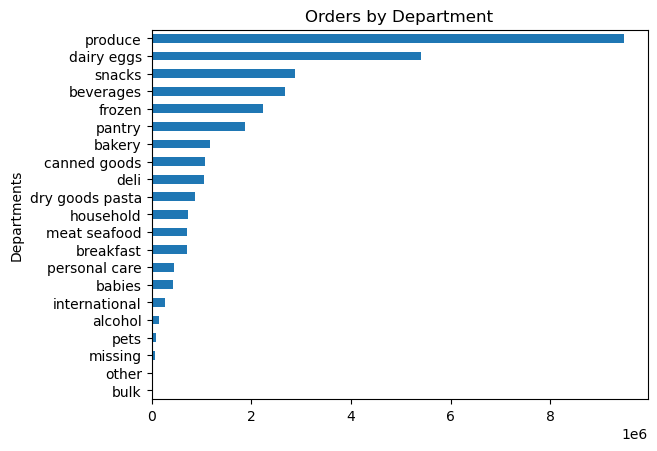

In [76]:
dept_frequency = df_final['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")
plt.ylabel('Departments')

In [77]:
dept_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency_bar_bar11.png'))

In [78]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,_merged2,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity_exclusion_flag,age_group,income_group,n_dependants_group,department,family_profile,week_days_orders
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children,Monday
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children,Tuesday
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children,Tuesday
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,low activity,30-39,low income,Has Dependants,beverages,married female with children,Wednesday
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high activity,30-39,low income,Has Dependants,beverages,married female with children,Wednesday


### Users Distribution - Brand Loyalty

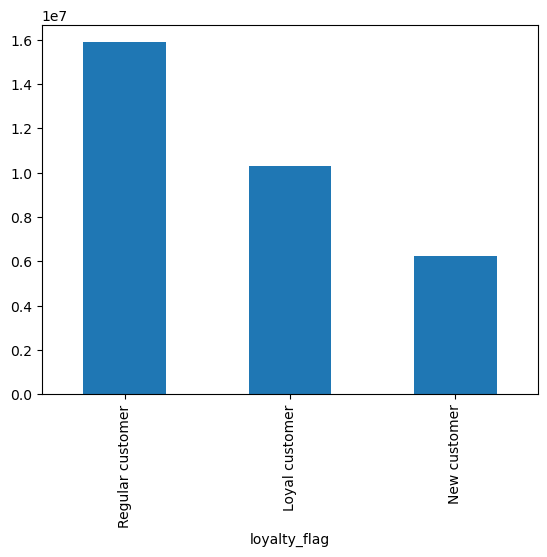

In [79]:
# "Regular Customers" make up most of the instacart users 
loyalty_bar = df_final['loyalty_flag'].value_counts().plot.bar()

### Ordering Habits Based on Customer’s Loyalty Status

In [80]:
loyalty_flag_department = pd.crosstab(df_final['department'],df_final['loyalty_flag'], dropna = False)

In [81]:
loyalty_flag_department

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


In [82]:
# Create a crosstab of loyalty_flag and departments
loyalty_flag_department = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna=False)

# Reorder columns for better visualization
loyalty_flag_department = loyalty_flag_department[['Loyal customer', 'New customer', 'Regular customer']]

Text(0, 0.5, 'Count')

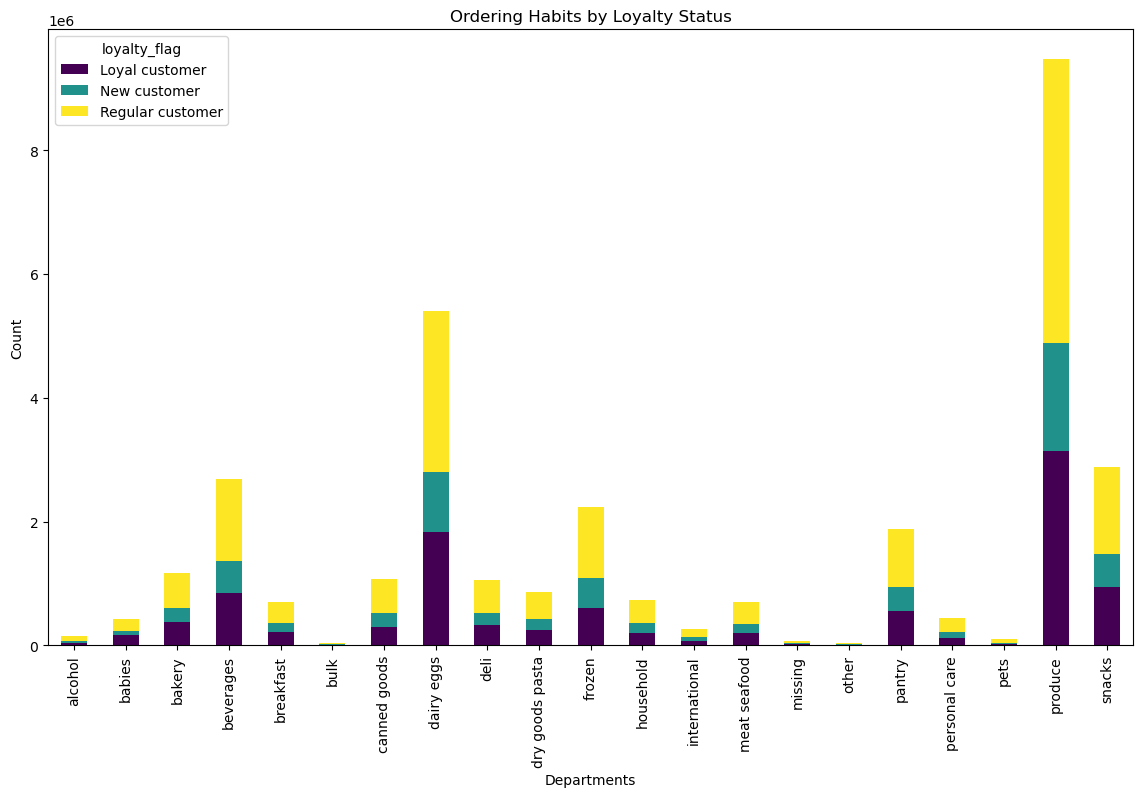

In [83]:

# Create a stacked bar chart
loyalty_flag_department.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Title and labels
plt.title('Ordering Habits by Loyalty Status')
plt.xlabel('Departments')
plt.ylabel('Count')

In [84]:

# Exporting the stacked bar
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_department_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Ordering Habits Based On a Customer’s Region

In [85]:
loyalty_flag_region = pd.crosstab(df_final['region'],df_final['loyalty_flag'], dropna = False)

In [86]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


In [87]:
# Create a crosstab of region and loyalty_flag
loyalty_flag_region = pd.crosstab(df_final['region'], df_final['loyalty_flag'], dropna=False)

# Reorder columns for better visualization
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]






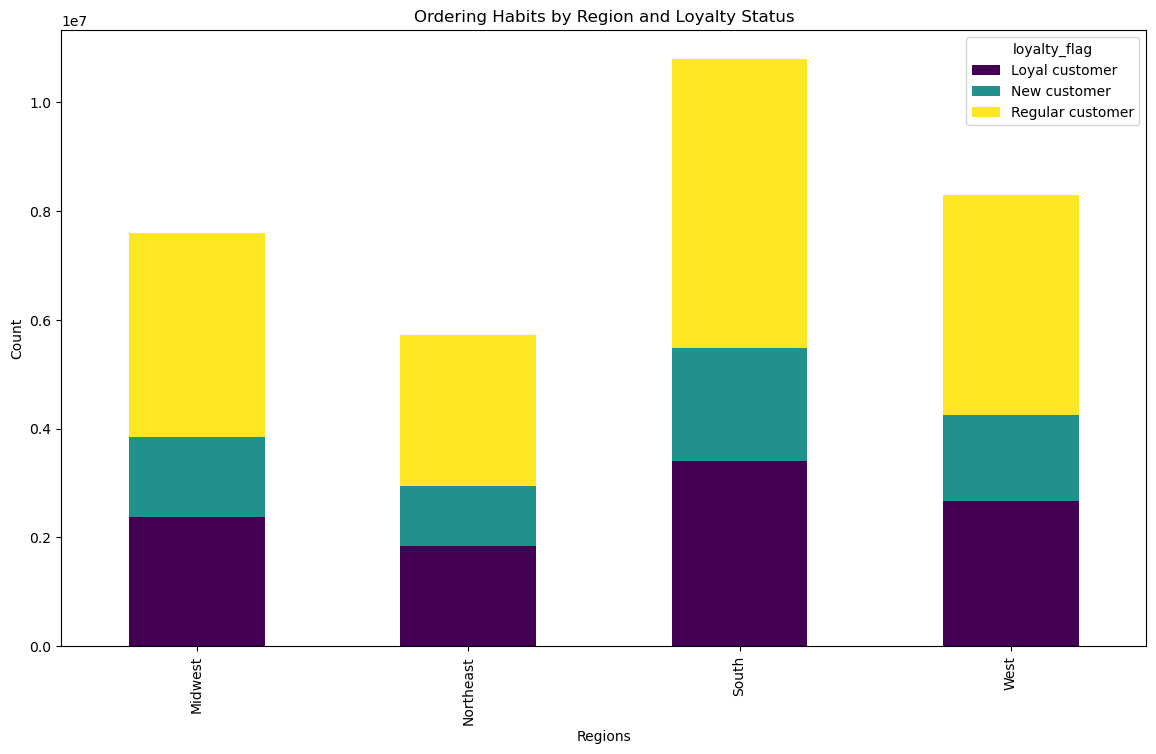

In [88]:
# Create a stacked bar chart
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.title('Ordering Habits by Region and Loyalty Status')
plt.xlabel('Regions')
plt.ylabel('Count')

# Show the plot
plt.show()

In [89]:
# Exporting the bar
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_region_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Connection between age and family status in terms of ordering habits

In [90]:
age_family_profile = pd.crosstab(df_final['age_group'],df_final['family_profile'], dropna = False)

In [91]:
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29,1468491,1558117,757721,738173,792882,775057
30-39,1919893,1885258,0,637763,0,630837
40-49,1887520,1954019,0,626260,0,641438
50-59,1907016,1880996,0,633822,0,642341
60-69,1831107,1893712,0,632490,0,629955
70+,2281497,2289127,0,768077,0,741290


In [92]:
# Create a crosstab of age_group and family_profile
age_family_crosstab = pd.crosstab(df_final['age_group'], df_final['family_profile'], dropna=False)

# Reorder columns for better visualization
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]





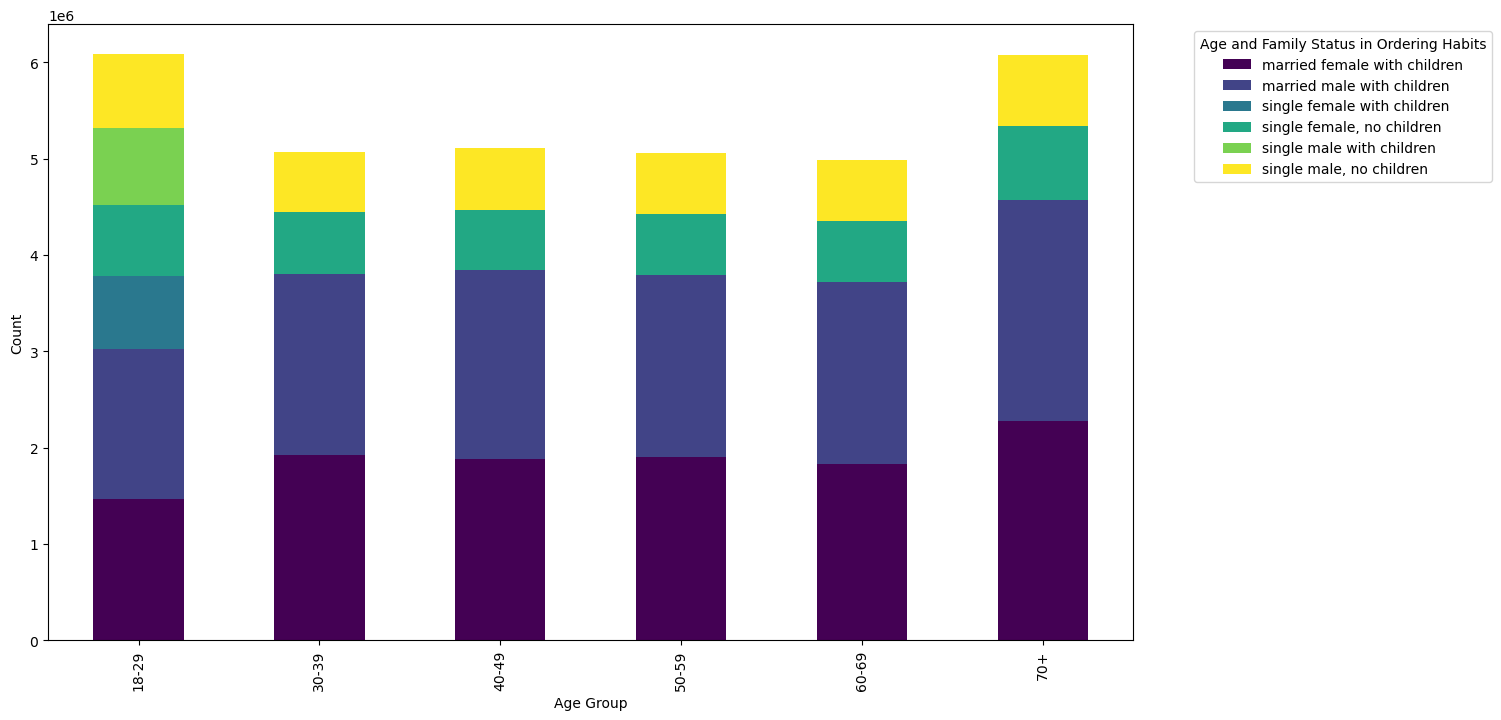

In [93]:
# Create a stacked bar chart
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
# Title and labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age and Family Status in Ordering Habits', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [95]:

# Exporting the bar
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_stacked_bar11.png'))

<Figure size 640x480 with 0 Axes>

### Exploring whether there is a connection between age and spending power (income)

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


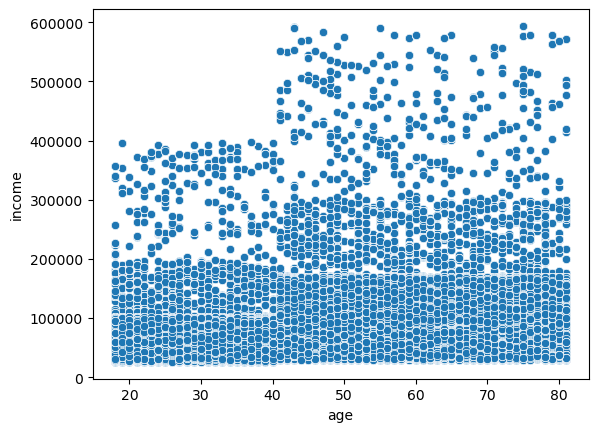

In [96]:
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df_final)

In [97]:
# Exporting the scatterplot
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot11.png'))

### Most of the customers are married

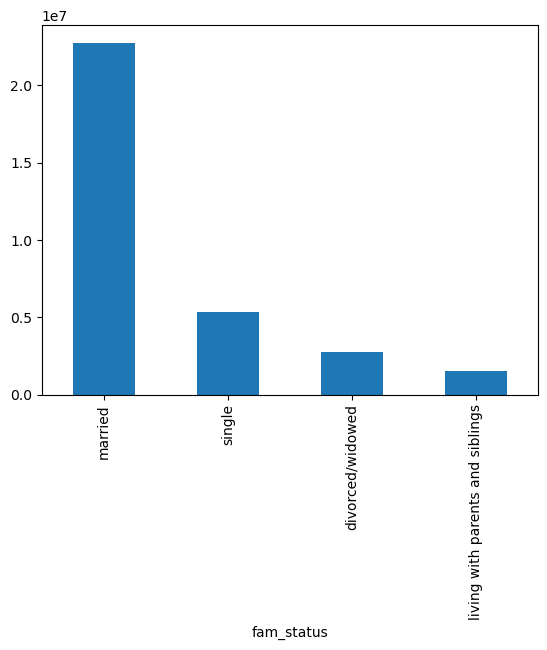

In [100]:
bar_marital = df_final['fam_status'].value_counts().plot.bar()

In [101]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital11.png'))

In [102]:
# Exporting this final cleaned data set
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_visual_the_end.pkl'))